<a href="https://www.kaggle.com/code/zaki171/google-stock-prices-eda?scriptVersionId=106682842" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyse/prices-split-adjusted.csv
/kaggle/input/nyse/fundamentals.csv
/kaggle/input/nyse/prices.csv
/kaggle/input/nyse/securities.csv
/kaggle/input/google-stock-prices-since-the-pandemic-started/stock_prices.csv
/kaggle/input/google-stock-prices-270921-230922/GOOG.csv


# Gathering the data 

In [2]:
prices = pd.read_csv('/kaggle/input/nyse/prices-split-adjusted.csv')
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [3]:
prices.tail()

,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [4]:
prices.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [5]:
prices.shape

(851264, 7)

In [6]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [7]:
prices['date'] = prices['date'].apply(pd.to_datetime)
prices.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [8]:
#open close columns indicate opening and closing price of stocks per day
#high and low columns are highest/lowest price of a stock on that day
#volume says vol total stocks traded per day

# Visualisation

In [9]:
prices.symbol.value_counts()

KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

501 stocks, notice how top trades share the same number

In [10]:
google = prices.loc[prices.symbol == 'GOOG']
google.head()

,date,symbol,open,close,low,high,volume
439,2010-01-04,GOOG,312.304948,312.205308,310.955001,313.580158,3927000.0
907,2010-01-05,GOOG,312.419511,310.830459,309.610028,312.748278,6031900.0
1375,2010-01-06,GOOG,311.761979,302.994813,302.048370,311.761979,7987100.0
1843,2010-01-07,GOOG,303.562685,295.941242,295.218951,303.861575,12876600.0
2311,2010-01-08,GOOG,294.895159,299.886470,293.455551,300.499172,9483900.0


In [11]:
google.tail()

,date,symbol,open,close,low,high,volume
848963,2016-12-23,GOOG,790.900024,789.909973,787.280029,792.739990,623400.0
849463,2016-12-27,GOOG,790.679993,791.549988,787.656982,797.859985,789100.0
849963,2016-12-28,GOOG,793.700012,785.049988,783.200012,794.229980,1132700.0
850463,2016-12-29,GOOG,783.330017,782.789978,778.919983,785.929993,742200.0
850963,2016-12-30,GOOG,782.750000,771.820007,770.409973,782.780029,1760200.0


<AxesSubplot:xlabel='date', ylabel='open'>

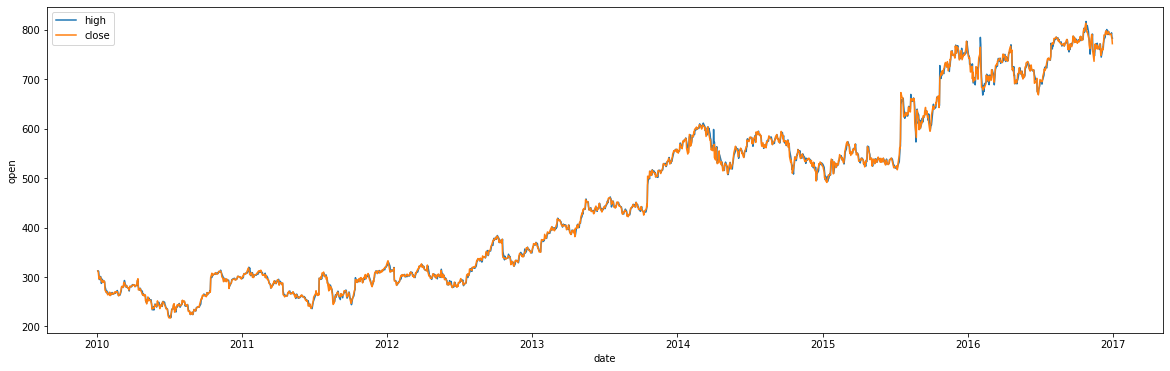

In [12]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google, y = 'open', x = 'date', label = 'high')
sns.lineplot(data = google, y = 'close', x = 'date', label = 'close')

Prices have an increasing trend

<AxesSubplot:xlabel='date', ylabel='high'>

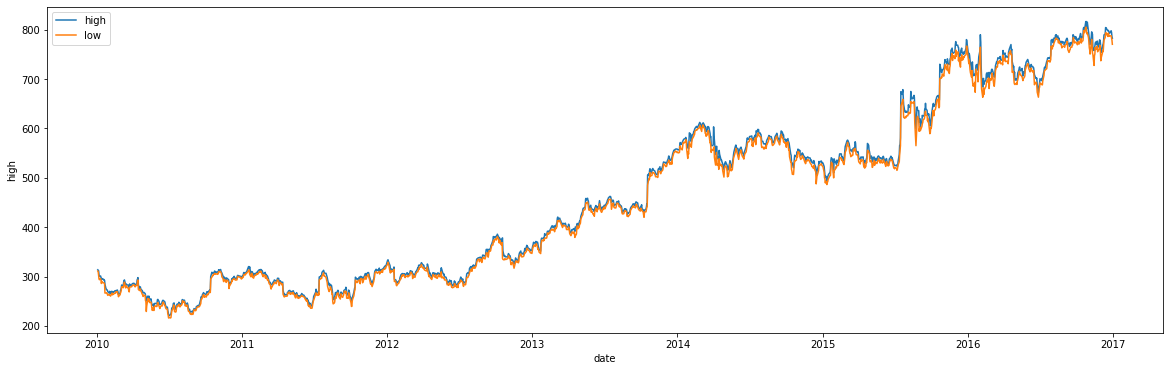

In [13]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google, y = 'high', x = 'date', label = 'high')
sns.lineplot(data = google, y = 'low', x = 'date', label = 'low')

<AxesSubplot:xlabel='date', ylabel='volume'>

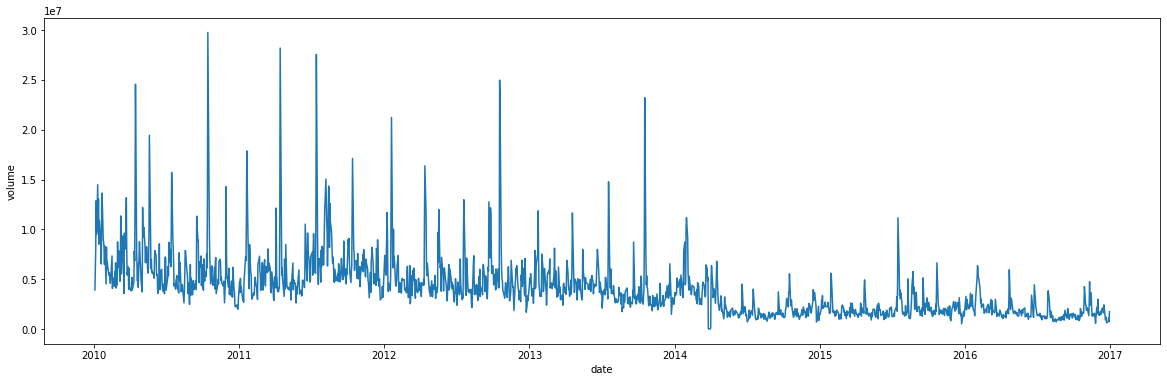

In [14]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google, x = 'date', y = 'volume')

Trend slightly decreases

In [15]:
google = google.set_index('date')

<AxesSubplot:xlabel='date'>

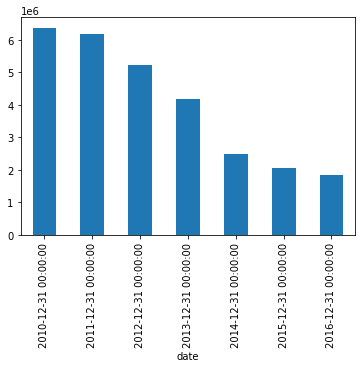

In [16]:
google['volume'].resample('Y').mean().plot.bar()

Stock prices increasing but volume traded decreasing - more people holding on to their (google) stocks.

# Google stocks since COVID

Taking a look at a different dataset about the stocks of Google more recently.

In [17]:
google_covid = pd.read_csv('/kaggle/input/google-stock-prices-since-the-pandemic-started/stock_prices.csv', parse_dates = ['Date'], index_col = 'Date')
google_covid.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


In [18]:
google_covid.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-06,108.135002,108.879997,106.510002,107.480003,107.480003,20565100
2022-09-07,107.760002,110.989998,107.614998,110.480003,110.480003,22987200
2022-09-08,109.180000,110.580002,108.059998,109.419998,109.419998,21660700
2022-09-09,110.050003,112.000000,110.000000,111.779999,111.779999,21732900
2022-09-12,111.989998,112.639999,110.930000,111.870003,111.870003,19714200


In [19]:
google_covid.shape

(632, 6)

In [20]:
google_covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 632 entries, 2020-03-11 to 2022-09-12
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       632 non-null    float64
 1   High       632 non-null    float64
 2   Low        632 non-null    float64
 3   Close      632 non-null    float64
 4   Adj Close  632 non-null    float64
 5   Volume     632 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 34.6 KB


In [21]:
google_covid.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000


<AxesSubplot:xlabel='Date', ylabel='Volume'>

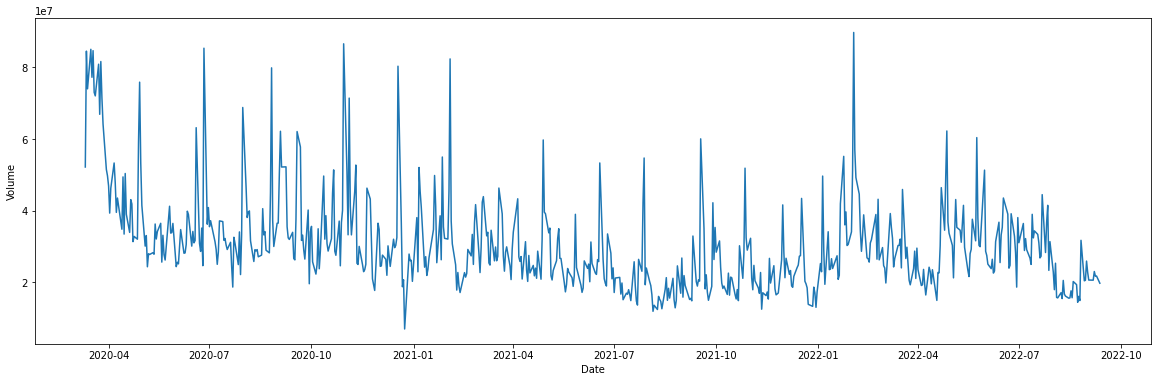

In [22]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, x = 'Date', y = 'Volume')

<AxesSubplot:xlabel='Date'>

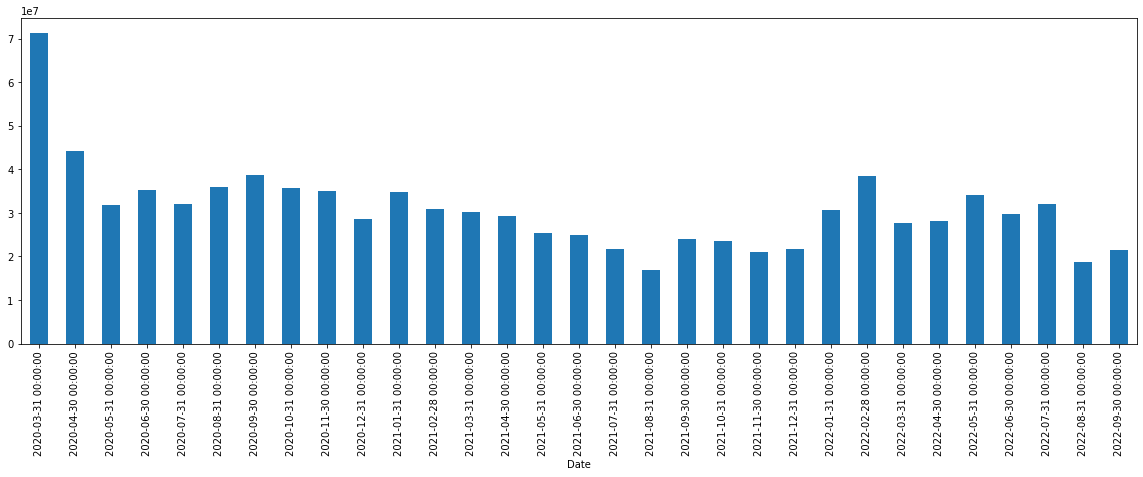

In [23]:
f, ax = plt.subplots(figsize=(20,6))
google_covid['Volume'].resample('M').mean().plot.bar()

<AxesSubplot:xlabel='Date', ylabel='Open'>

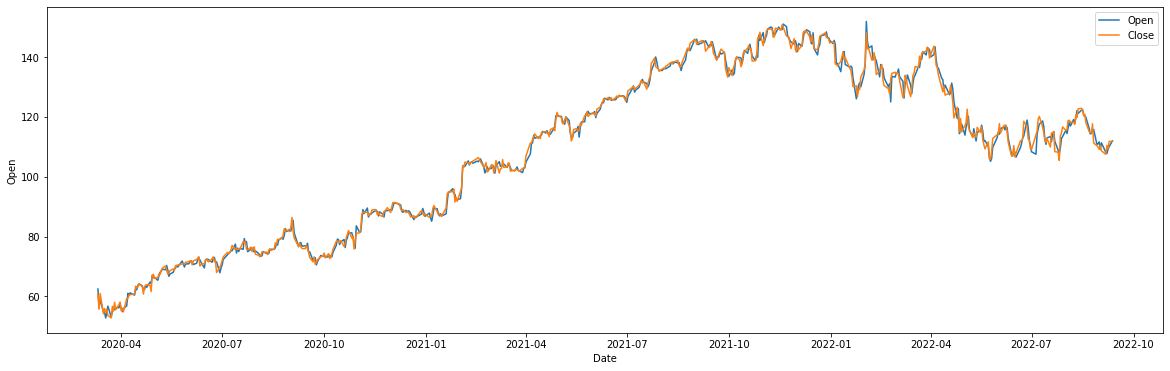

In [24]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, y = 'Open', x = 'Date', label = 'Open')
sns.lineplot(data = google_covid, y = 'Adj Close', x = 'Date', label = 'Close')

<AxesSubplot:xlabel='Date', ylabel='High'>

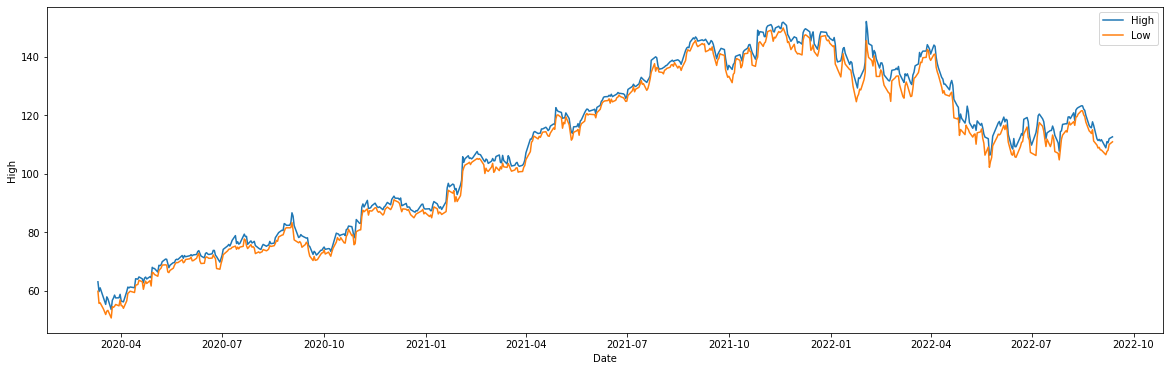

In [25]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, y = 'High', x = 'Date', label = 'High')
sns.lineplot(data = google_covid, y = 'Low', x = 'Date', label = 'Low')

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

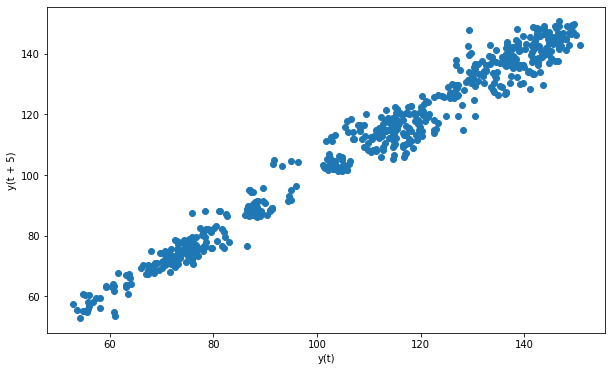

In [26]:
from pandas.plotting import lag_plot
f, ax = plt.subplots(figsize=(10,6))
lag_plot(google_covid['Adj Close'], lag = 5)

Strong positive autocorrelation

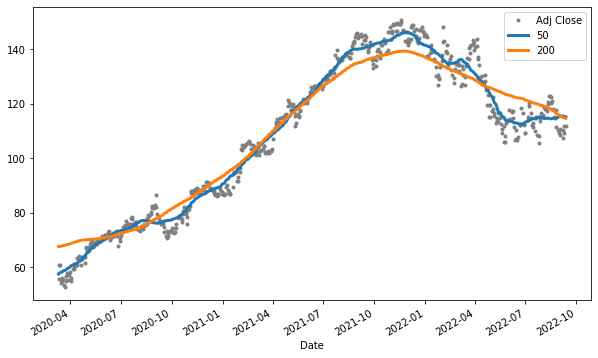

In [27]:
f, ax = plt.subplots(figsize=(10,6))
ax = google_covid['Adj Close'].plot(style=".", color="0.5")

moving_average = google_covid['Adj Close'].rolling(window = 50, center = True, min_periods = 25).mean()
moving_average_200 = google_covid['Adj Close'].rolling(window = 200, center = True, min_periods = 100).mean()
moving_average.plot(linewidth = 3, label = '50')
moving_average_200.plot(label = '200', linewidth = 3)
leg = ax.legend();

When the 50-day moving average rises above the 200-day moving average, this may signal a trader to long stocks (and short stocks when it falls below).

In [28]:
google_covid['Daily Return'] = google_covid['Adj Close'].pct_change()
google_covid.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000,NaN
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000,-0.082688
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000,0.094017
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000,-0.111008
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000,0.032711


<AxesSubplot:xlabel='Date', ylabel='Daily Return'>

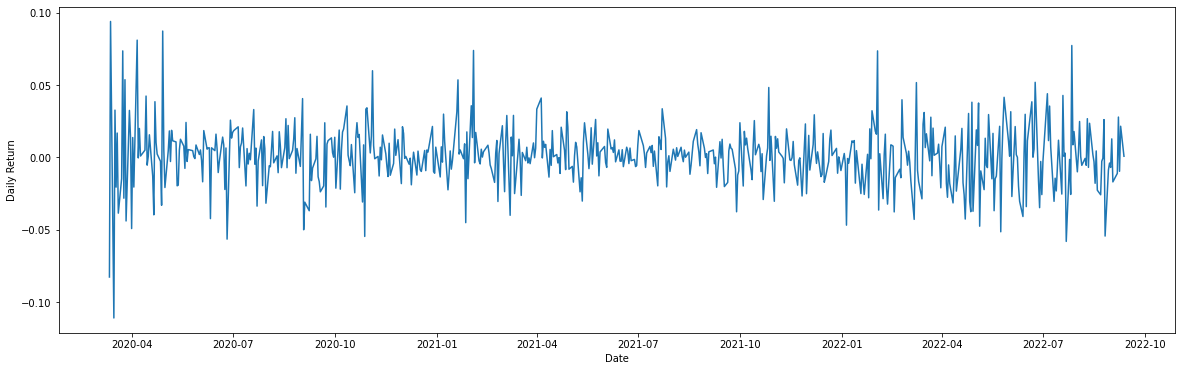

In [29]:
f, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data = google_covid, x = 'Date', y = 'Daily Return')

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

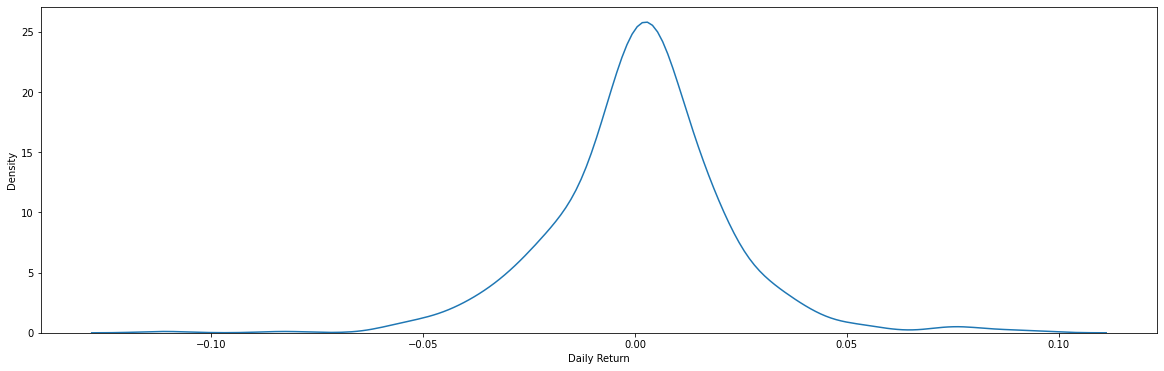

In [30]:
f, ax = plt.subplots(figsize=(20,6))
sns.kdeplot(data = google_covid,x = 'Daily Return')

# Prediction

In [31]:
google_covid = google_covid.to_period('B')

In [32]:
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from sklearn.linear_model import LinearRegression
y = google_covid['Adj Close']
dp = DeterministicProcess(index = google_covid.index, constant = True, order = 2, drop = True)
X = dp.in_sample()
X.head()

,const,trend,trend_squared
Date,,,
2020-03-11,1.0,1.0,1.0
2020-03-12,1.0,2.0,4.0
2020-03-13,1.0,3.0,9.0
2020-03-16,1.0,4.0,16.0
2020-03-17,1.0,5.0,25.0


In [33]:
model = LinearRegression(fit_intercept = False)
model.fit(X,y)
y_pred = pd.Series(model.predict(X), index = X.index)
y_pred

Date
2020-03-11     41.541243
2020-03-12     41.939270
2020-03-13     42.336410
2020-03-16     42.732664
2020-03-17     43.128032
                 ...    
2022-09-06    117.123798
2022-09-07    116.965978
2022-09-08    116.807270
2022-09-09    116.647677
2022-09-12    116.487196
Freq: B, Length: 632, dtype: float64

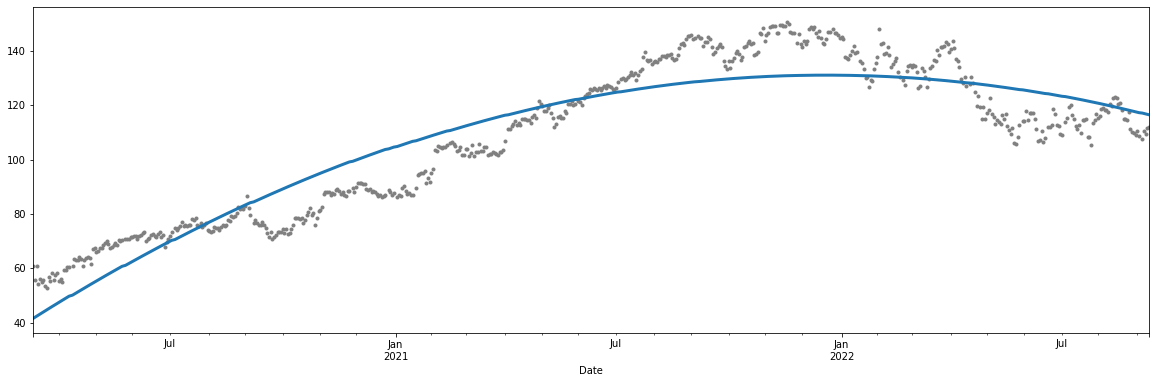

In [34]:
ax = y.plot(style=".", color="0.5", figsize=(20,6))
_ = y_pred.plot(ax=ax, linewidth=3, label="Trend")

In [35]:
X = dp.out_of_sample(steps= 90)
y_fore = pd.Series(model.predict(X), index = X.index)
y_fore.head()

2022-09-13    116.325829
2022-09-14    116.163576
2022-09-15    116.000436
2022-09-16    115.836410
2022-09-19    115.671497
Freq: B, dtype: float64

In [36]:
google_covid.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2020-03-11,62.485001,63.048000,59.803501,60.770500,60.770500,52170000,NaN
2020-03-12,56.299999,59.693501,55.665001,55.745499,55.745499,84534000,-0.082688
2020-03-13,58.950001,60.987999,55.857151,60.986500,60.986500,74002000,0.094017
2020-03-16,54.799999,57.613350,53.722000,54.216499,54.216499,85048000,-0.111008
2020-03-17,54.655499,56.542999,52.800499,55.990002,55.990002,77230000,0.032711


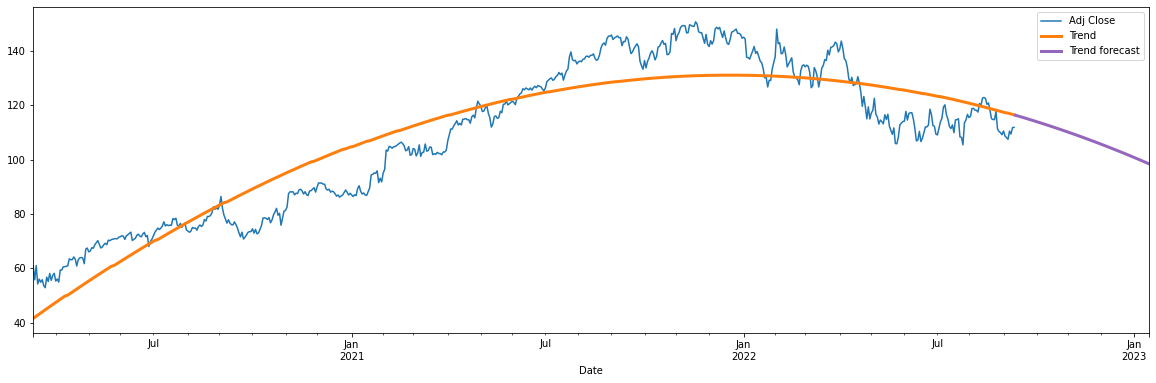

In [37]:
ax = google_covid['Adj Close'].plot(figsize = (20,6))
ax = y_pred.plot(ax=ax, linewidth=3, label="Trend")
ax = y_fore.plot(ax=ax, linewidth=3, label = 'Trend forecast', color = 'C4')
_ = ax.legend()

This is a tough trend to model as using orders of 3 or more result in unlikely forecasts

# Using ARIMA

In [38]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(google_covid['Adj Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -1.981513
p-value: 0.294737


<AxesSubplot:xlabel='Date'>

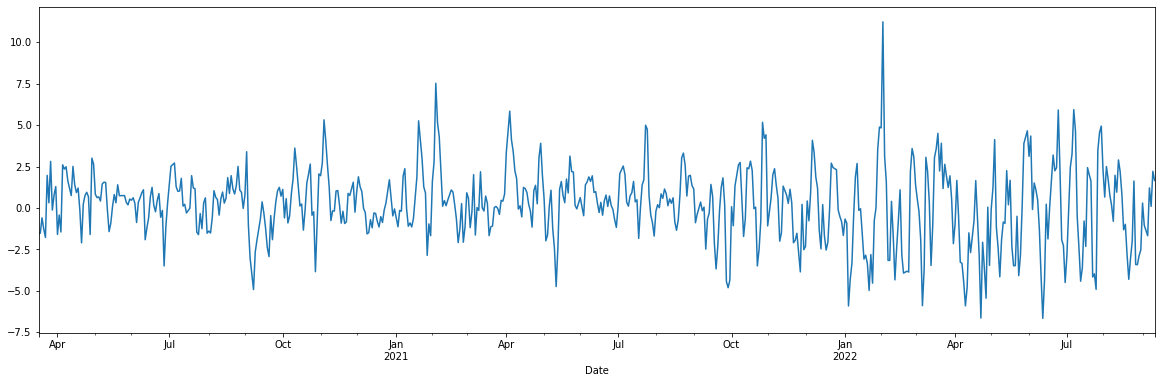

In [39]:
f, ax = plt.subplots(figsize=(20,6))
moving_average = google_covid['Adj Close'].rolling(5).mean()
diff = y - moving_average
diff.dropna(inplace = True)
diff.plot()

Detrended

In [40]:
result = adfuller(diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %s' % result[1])

ADF Statistic: -13.671144
p-value: 1.4589285550503235e-25


Not stationary anymore

No seasonality

p-value greater than 0.05 indicates data not stationary

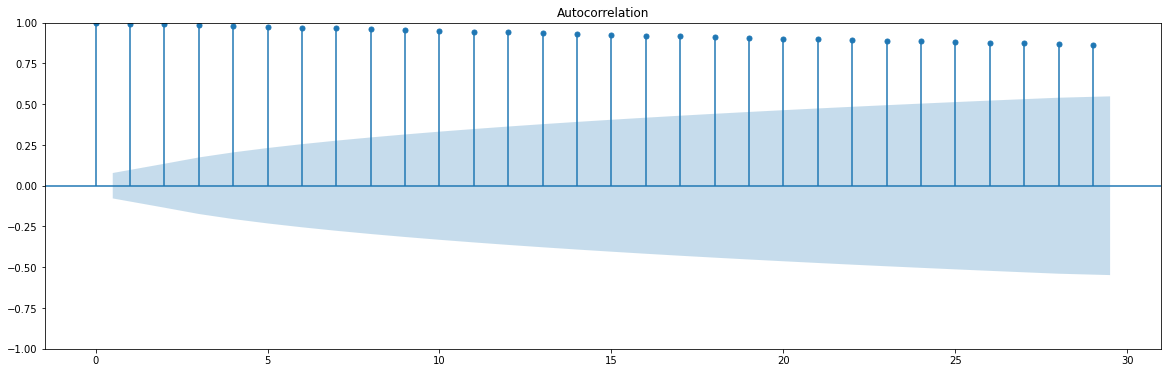

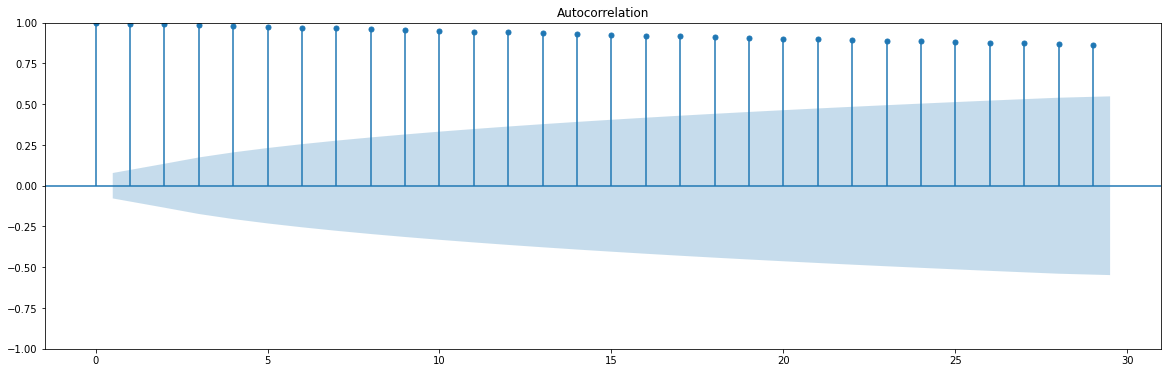

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
f, ax = plt.subplots(figsize=(20,6))
plot_acf(google_covid['Adj Close'], ax=ax)

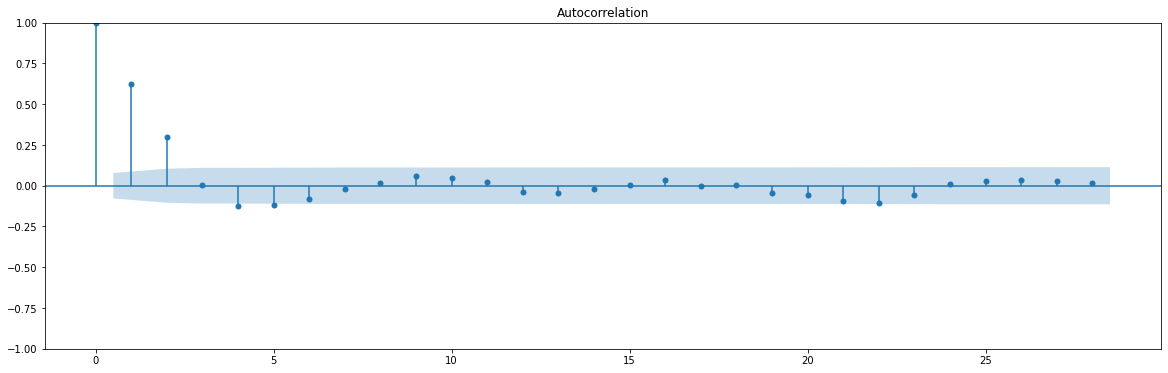

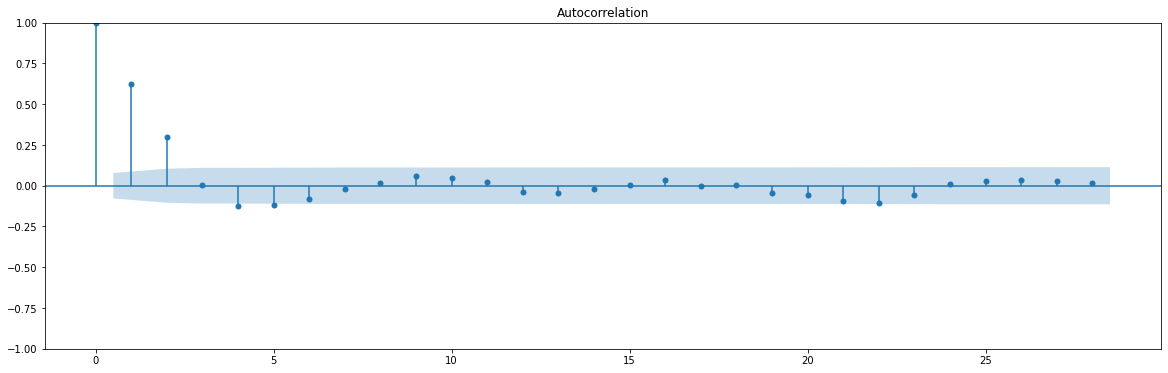

In [42]:
f, ax = plt.subplots(figsize=(20,6))
plot_acf(diff, ax=ax)

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


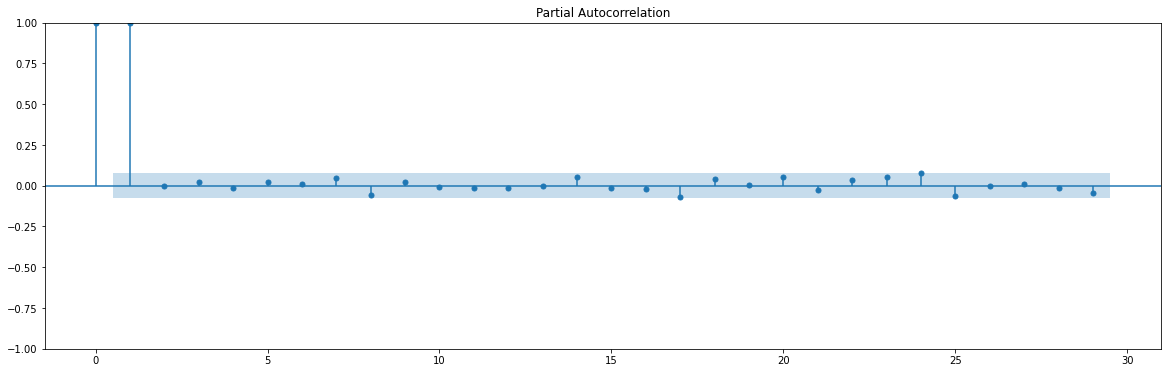

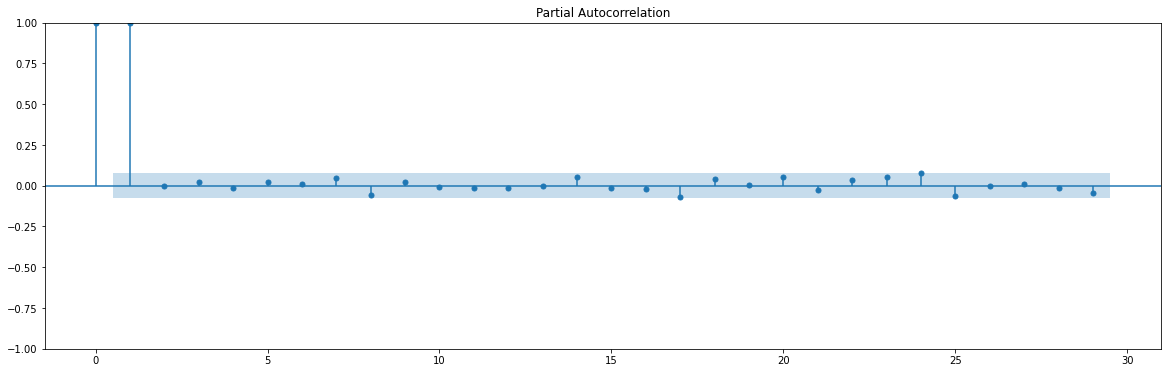

In [43]:
f, ax = plt.subplots(figsize=(20,6))
plot_pacf(google_covid['Adj Close'], ax =ax)

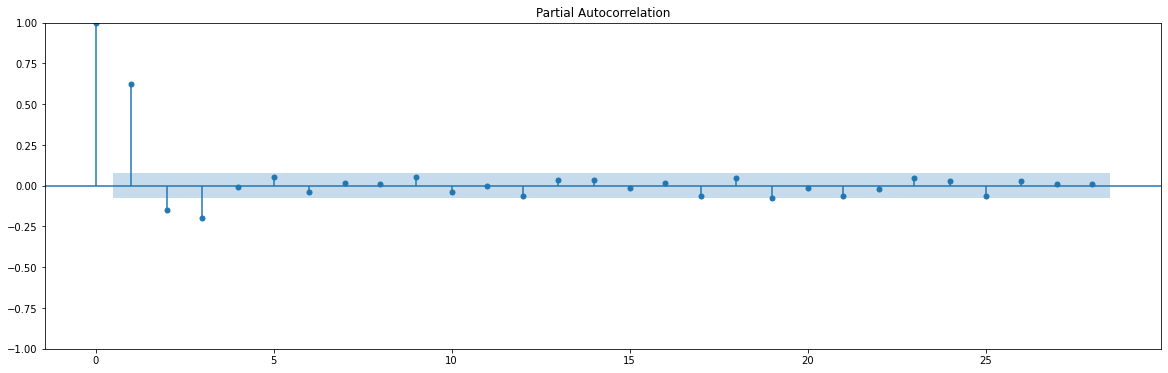

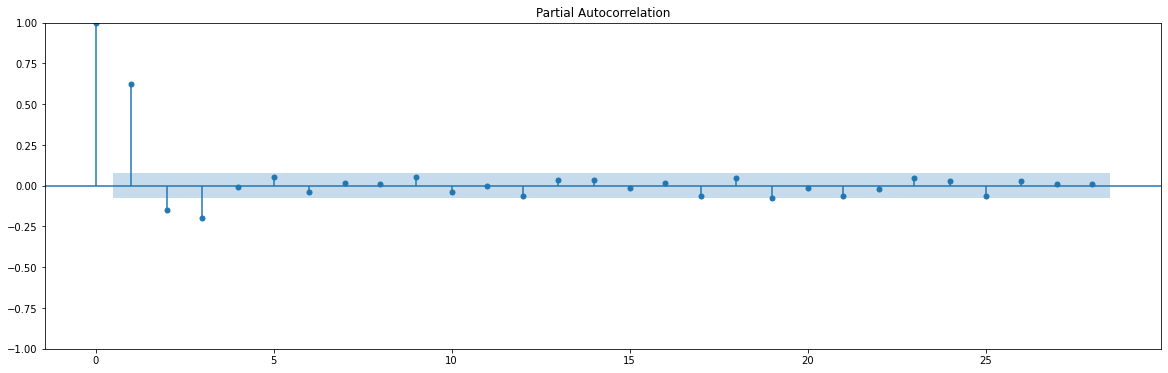

In [44]:
f, ax = plt.subplots(figsize=(20,6))
plot_pacf(diff, ax =ax)

In [45]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(diff, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                  628
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1211.782
Date:                Tue, 27 Sep 2022   AIC                           2433.565
Time:                        21:36:29   BIC                           2455.770
Sample:                    03-17-2020   HQIC                          2442.192
                         - 09-12-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2593      0.106     11.923      0.000       1.052       1.466
ar.L2         -0.5115      0.064     -7.949      0.000      -0.638      -0.385
ma.L1         -1.5444      0.119    -12.942      0.0

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


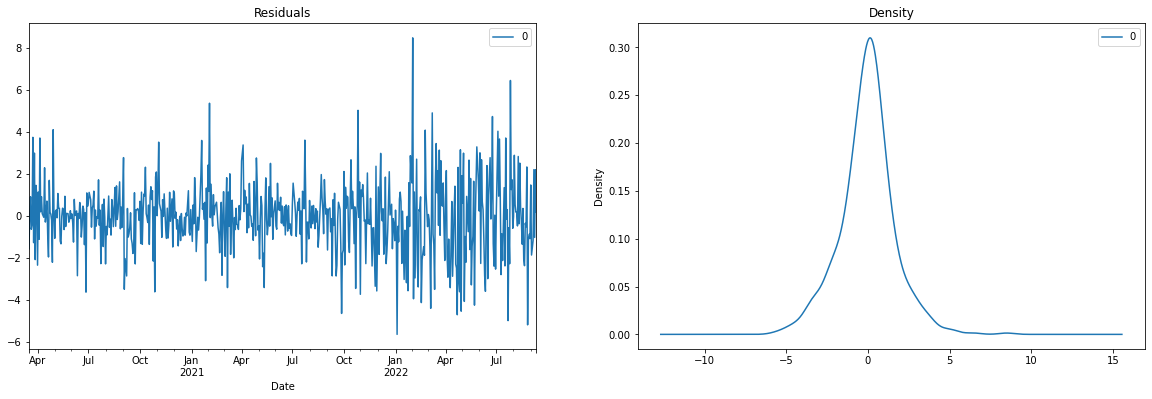

In [46]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(20,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()